# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













# Solucion Parcial

##1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$

\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

In [67]:
import numpy as np
import matplotlib.pylab as plt
g=9.8
def alcance_max(v0, theta, b, R):
  thetar=np.deg2rad(theta)
  yf= lambda R: (((g/b)+(v0*np.sin(thetar))))*(R/(v0*np.cos(thetar)))+((g/(b)**2)*np.log(1-((R*b)/(v0*np.cos(thetar)))))
  return yf

## 2. Asumiento que la bolita es lanzada con una rapidez de $v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.

In [68]:
x=np.arange(0,10)

In [69]:
#Grafica de la trayectoria para ver donde y=0
def trayectoria(v0, theta, b, t):
  thetar= np.deg2rad(theta)
  x=((v0*np.cos(thetar))/b)*(1-np.exp(-b*t))
  y=(1/b)*((g/b)+(v0*np.sin(thetar)))*(1-np.exp(-b*t))-(g/b)*t
  return x,y

t=np.linspace(0,10)
trayectoria(55,45,0.005,t )

(array([  0.        ,   7.93286478,  15.85763893,  23.7743307 ,
         31.68294834,  39.58350007,  47.47599412,  55.36043872,
         63.23684207,  71.10521237,  78.96555782,  86.8178866 ,
         94.66220689, 102.49852685, 110.32685464, 118.14719842,
        125.95956632, 133.76396649, 141.56040704, 149.3488961 ,
        157.12944178, 164.90205217, 172.66673537, 180.42349947,
        188.17235254, 195.91330265, 203.64635786, 211.37152622,
        219.08881578, 226.79823457, 234.49979061, 242.19349194,
        249.87934655, 257.55736245, 265.22754764, 272.8899101 ,
        280.54445782, 288.19119875, 295.83014087, 303.46129212,
        311.08466045, 318.70025381, 326.30808011, 333.90814729,
        341.50046325, 349.0850359 , 356.66187314, 364.23098286,
        371.79237293, 379.34605124]),
 array([   0.        ,    7.72885255,   15.04186744,   21.93946879,
          28.42208028,   34.49012514,   40.14402618,   45.38420579,
          50.21108592,   54.62508808,   58.62663336,   62.

In [70]:
t=np.linspace(0,8)
x=trayectoria(55,45,0.005,t )[0]
x

array([  0.        ,   6.34693934,  12.68869962,  19.02528506,
        25.3566999 ,  31.68294834,  38.0040346 ,  44.3199629 ,
        50.63073744,  56.93636243,  63.23684207,  69.53218056,
        75.8223821 ,  82.10745088,  88.38739108,  94.66220689,
       100.93190249, 107.19648206, 113.45594977, 119.71030981,
       125.95956632, 132.20372348, 138.44278545, 144.67675639,
       150.90564045, 157.12944178, 163.34816453, 169.56181284,
       175.77039085, 181.97390271, 188.17235254, 194.36574448,
       200.55408265, 206.73737118, 212.91561418, 219.08881578,
       225.25698008, 231.42011121, 237.57821326, 243.73129034,
       249.87934655, 256.02238598, 262.16041274, 268.29343091,
       274.42144457, 280.54445782, 286.66247472, 292.77549937,
       298.88353583, 304.98658816])

In [71]:
y=trayectoria(55,45,0.005,t )[1]
y

array([ 0.        ,  6.21636263, 12.16653485, 17.85073387, 23.26917673,
       28.42208028, 33.30966119, 37.93213598, 42.28972096, 46.38263228,
       50.21108592, 53.77529766, 57.07548314, 60.11185779, 62.88463688,
       65.39403551, 67.64026859, 69.62355086, 71.34409688, 72.80212106,
       73.9978376 , 74.93146055, 75.60320377, 76.01328096, 76.16190563,
       76.04929112, 75.67565062, 75.0411971 , 74.1461434 , 72.99070216,
       71.57508586, 69.89950679, 67.96417708, 65.7693087 , 63.31511342,
       60.60180285, 57.62958843, 54.39868141, 50.9092929 , 47.16163381,
       43.15591489, 38.89234672, 34.37113969, 29.59250404, 24.55664982,
       19.26378694, 13.7141251 ,  7.90787385,  1.84524257, -4.47355955])

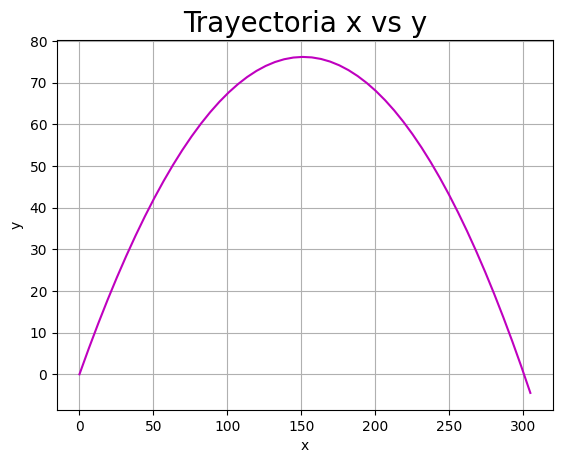

In [72]:
plt.plot(x,y,'m')
plt.title('Trayectoria x vs y',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

In [73]:
#Metodo de la secante
from scipy import optimize
g = 9.8
v0 = 55
thetar = np.deg2rad(45)
b = 0.005

yf = lambda R: (((g/b)+(v0*np.sin(thetar))))*(R/(v0*np.cos(thetar)))+((g/(b)**2)*np.log(1-((R*b)/(v0*np.cos(thetar)))))

raiz_newton = optimize.newton(yf, 300)
print('La raiz usando el metodo de newton sera:', raiz_newton)

La raiz usando el metodo de newton sera: 300.6920766931974


## 3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


In [74]:
#Metodo de biseccion
raiz_biseccion= optimize.bisect(yf,290,310)
print('La raiz usando el metodo de biseccion sera:',raiz_biseccion)

La raiz usando el metodo de biseccion sera: 300.69207669317507


\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


In [75]:
def tiempo_vuelo(b,R, theta, v0):
  theta=np.deg2rad(theta)
  v0=np.cos(theta)*v0
  tv=(-1/b)*np.log(1-((R*b)/(v0)))
  return tv

In [76]:
tiempo_total=tiempo_vuelo(0.005,raiz_newton, 45, 55)

In [77]:
tiempo_total

7.885101833164389


## 4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.


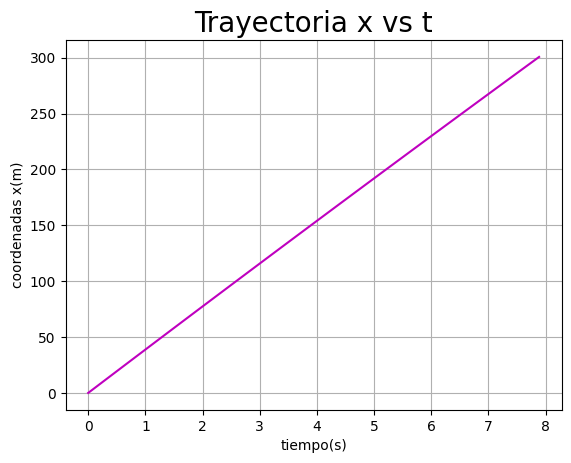

In [78]:
#x vs t

t=np.linspace(0,tiempo_total)
x=trayectoria(55,45,0.005,t)[0]
plt.plot(t,x, 'm')
plt.title('Trayectoria x vs t',fontsize=20)
plt.xlabel('tiempo(s)')
plt.ylabel('coordenadas x(m)')

plt.grid()
plt.show()

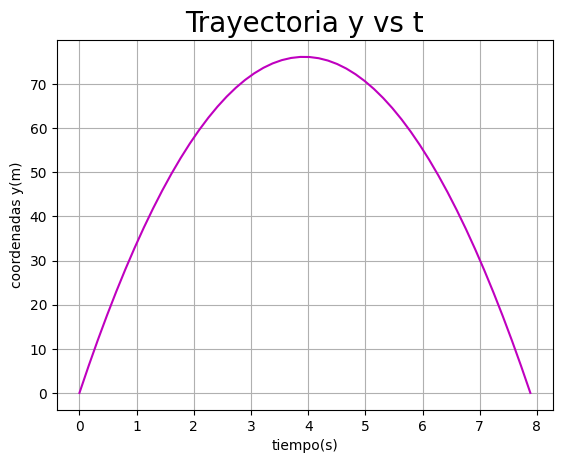

In [79]:
#y vs t
t=np.linspace(0,tiempo_total)
y=trayectoria(55,45,0.005,t)[1]
plt.plot(t,y,'m')
plt.title('Trayectoria y vs t',fontsize=20)
plt.xlabel('tiempo(s)')
plt.ylabel('coordenadas y(m)')

plt.grid()
plt.show()

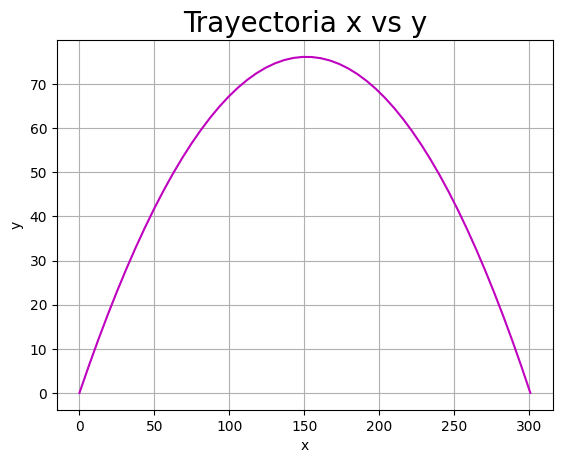

In [80]:
#x vs y
plt.plot(x,y,'m')
plt.title('Trayectoria x vs y',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()


## 5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$. Generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

In [81]:
#Aproximacion del alcance para emplear el metodo de biseccion
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
def aprox(v0, theta):
  x2=(2*(v0**2)*np.cos(theta)*np.sin(theta))/g
  x1=((v0**2)*np.cos(theta)*np.sin(theta))/g
  return x1, x2

#aprox(55, theta)
x=aprox(55, theta)[0]
x1=aprox(55, theta)[1]

#Calculo de los alcances maximos
b = 0.009
v0 = 40
theta=np.arange(0, 90, 5)
theta_r=np.deg2rad(theta)
R_theta=np.zeros(len(theta))
tv_theta=np.zeros(len(theta))
for i in range(len(theta_r)):
  x=aprox(55, theta_r[i])[0]
  x1=aprox(55, theta_r[i])[1]
  yf= lambda R: (((g/b)+(v0*np.sin(theta_r[i]))))*(R/(v0*np.cos(theta_r[i])))+((g/(b)**2)*np.log(1-((R*b)/(v0*np.cos(theta_r[i])))))
  R = optimize.bisect(yf,x, x1)
  R_theta[i] = R




In [82]:
R_theta

array([  0.        ,  28.23014829,  55.36860162,  80.60916747,
       103.21229431, 122.52570349, 138.00196718, 149.21265322,
       155.85877309, 157.77738133, 154.94428206, 147.47289663,
       135.60943641, 119.72460416, 100.3021167 ,  77.92440046,
        53.25586042,  27.02416248])

In [83]:
theta=np.arange(0, 90, 5)
theta_r=np.deg2rad(theta)
tiempo_total=tiempo_vuelo(0.009, R_theta, theta_r, 40)
xt=tiempo_total
xt

array([-0.        ,  0.70800547,  1.39291606,  2.0337498 ,  2.6107894 ,
        3.10624914,  3.50489588,  3.79459218,  3.96673073,  4.01653472,
        3.9432059 ,  3.7499123 ,  3.44361849,  3.03477143,  2.5368645 ,
        1.96590799,  1.33983782,  0.67789433])

## 6. Realice un gráfico de $R$ vs $t_v$

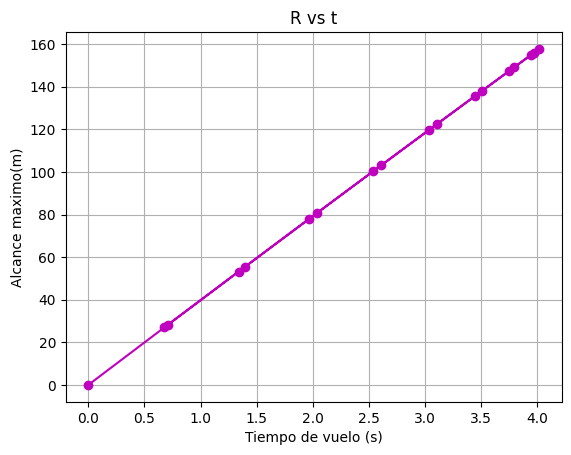

In [84]:
#R vs t
plt.plot(xt,R_theta, marker='o', color='m')
plt.xlabel('Tiempo de vuelo (s)')
plt.ylabel('Alcance maximo(m)')
plt.title('R vs t')
plt.grid()
plt.show()

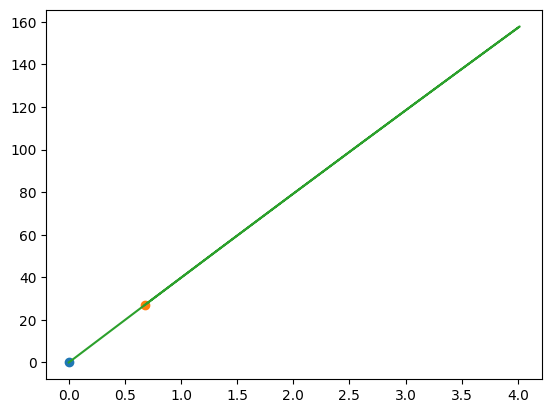

In [85]:
plt.figure()
plt.plot(xt[0],R_theta[0],"o")
plt.plot(xt[len(theta)-1],R_theta[len(theta)-1],"o")
plt.plot(xt,R_theta)

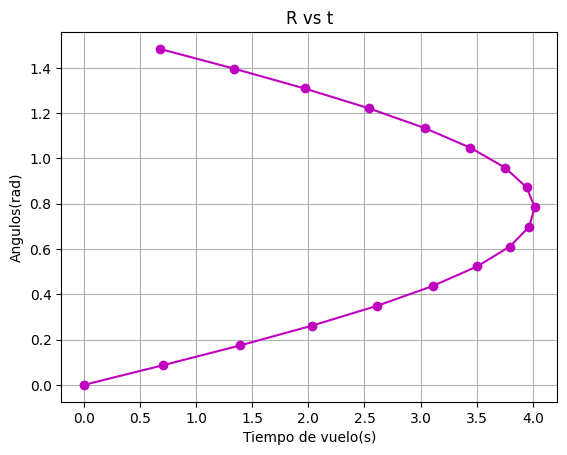

In [86]:
#R vs t
plt.plot(xt,theta_r, marker='o', color='m')
plt.xlabel('Tiempo de vuelo(s)')
plt.ylabel('Angulos(rad)')
plt.title('R vs t')
plt.grid()
plt.show()

### **bold text**

## 7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.

In [87]:
def trayectoria(v0, theta, b, t):
  theta_r= np.deg2rad(theta)
  x=((v0*np.cos(thetar))/b)*(1-np.exp(-b*t))
  y=(1/b)*((g/b)+(v0*np.sin(thetar)))*(1-np.exp(-b*t))-(g/b)*t
  return x,y



In [88]:
def trayectoria(v0, theta, b, t):
  thetar= np.deg2rad(theta)
  x=((v0*np.cos(thetar))/b)*(1-np.exp(-b*t))
  y=(1/b)*((g/b)+(v0*np.sin(thetar)))*(1-np.exp(-b*t))-(g/b)*t
  return x,y

t=np.linspace(0,20)
trayectoria(40,45,0.005,t)

(array([  0.        ,  11.53282831,  23.04214424,  34.52799573,
         45.9904306 ,  57.4294966 ,  68.84524137,  80.23771246,
         91.60695732, 102.9530233 , 114.27595766, 125.57580754,
        136.85262003, 148.10644208, 159.33732057, 170.54530226,
        181.73043385, 192.89276192, 204.03233296, 215.14919336,
        226.24338942, 237.31496736, 248.36397327, 259.39045319,
        270.39445304, 281.37601865, 292.33519574, 303.27202998,
        314.18656691, 325.07885199, 335.94893058, 346.79684796,
        357.6226493 , 368.42637971, 379.20808416, 389.96780758,
        400.70559477, 411.42149045, 422.11553926, 432.78778573,
        443.43827432, 454.06704938, 464.67415518, 475.25963591,
        485.82353563, 496.36589837, 506.88676802, 517.38618839,
        527.86420323, 538.32085618]),
 array([ 0.00000000e+00,  1.07170568e+01,  1.97812762e+01,  2.71960278e+01,
         3.29646744e+01,  3.70905721e+01,  3.95770700e+01,  4.04275103e+01,
         3.96452286e+01,  3.72335535e+01, 

(0.0, 85.0)

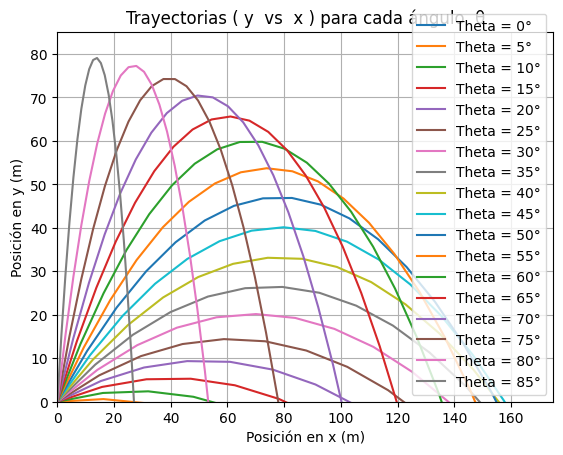

In [89]:
#Grafica/trayectoria
for i in range(len(theta_r)):
  plt.plot(trayectoria(40,0+i*5,0.009,t)[0],trayectoria(40,0+i*5,0.009,t)[1], label=f'Theta = {0+i*5}°')
plt.legend()
plt.grid()
plt.title('Trayectorias ( y  vs  x ) para cada ángulo  θ')
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.xlim(0,175)
plt.ylim(0,85)